# EIT-CEM Foward Problem

In [1]:
#Auxiliar modules
from dolfin import*
from mshr import*
import numpy as np
from fenics import*
import matplotlib.pyplot as plt
import time
%matplotlib inline

#My modules
from module1_mesh import *
from module2_foward import *
from module3_inverse import *
from module4_auxiliar import *

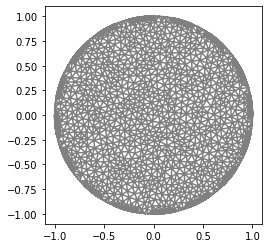

In [43]:
"Electrodes and Mesh"
ele_pos=electrodes_position(L=16, per_cober=0.5, rotate=0)
mesh_direct=MyMesh(r=1, n=20, n_in=60, n_out=8, electrodes_obj=ele_pos)
plot(mesh_direct);

#### Malhas

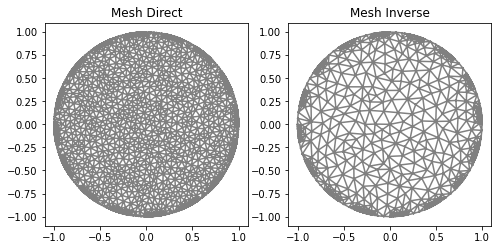

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_direct, title="Mesh Direct");
plt.subplot(1,2,2)
plot(mesh_inverse, title="Mesh Inverse");

## Problema Direto

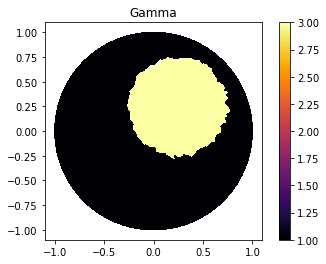

In [17]:
"Gamma function"
ValuesCells0=GammaCircle(mesh_direct,3.0,1.0,0.50, 0.25, 0.25);
gamma0=CellFunction(mesh_direct, values=ValuesCells0)

"Plot"
V_DG=FiniteElement('DG',mesh_direct.ufl_cell(),0)
gamma_direct=plot_figure(mesh_direct, V_DG, gamma0, name="Gamma");

### Foward Problem

In [18]:
"Foward Problem"
VD=FiniteElement('CG',mesh_direct.ufl_cell(),1) #Lagrange pol. degree 1
l=int(L)                                        #Measurements number.
z=np.ones(L)*0.025                              #Impedance
I_all=current_method(L,l, method=2)             #Current pattern

#Solver
FowardObject=FowardProblem(mesh_direct,  ele_pos,  z)
list_u0, list_U0 = FowardObject.solve_foward(VD, gamma0, I_all, l)
list_U0 = FowardObject.sol_asarray()

#### Fronteira da solução

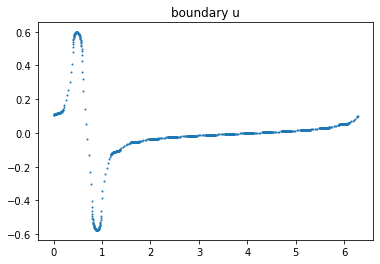

In [45]:
index=1
u_data=getBoundaryVertex(mesh_direct, list_u0[index]);
data_u0=plot_boundary(mesh_direct, data=u_data, name='boundary u', line=0);

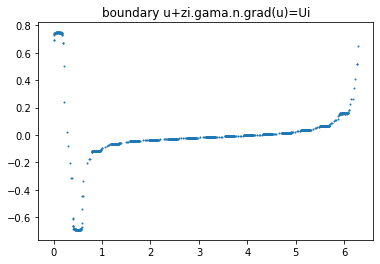

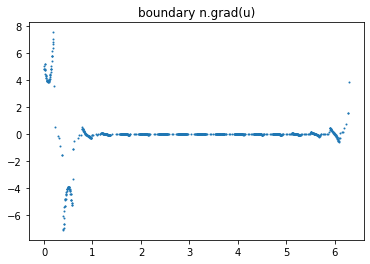

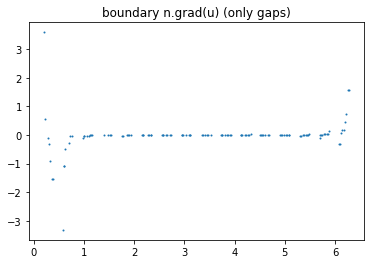

In [25]:
data = FowardObject.verify_solution_graphs(gamma0, sol_index=0, method=1)
data = FowardObject.verify_solution_graphs(gamma0, sol_index=0, method=2)
data = FowardObject.verify_solution_graphs(gamma0, sol_index=0, method=3)

In [37]:
FowardObject.verify_solution_values(I_all, gamma0, sol_index=0, method=1)

Current values
Calculated: 0.9315 Expected: 1.0
Calculated: -0.9286 Expected: -1.0
Calculated: -0.0019 Expected: 0.0
Calculated: -0.0002 Expected: 0.0
Calculated: -0.0001 Expected: 0.0
Calculated: -0.0 Expected: 0.0
Calculated: -0.0 Expected: 0.0
Calculated: 0.0 Expected: 0.0
Calculated: -0.0 Expected: 0.0
Calculated: 0.0 Expected: 0.0
Calculated: 0.0 Expected: 0.0
Calculated: 0.0 Expected: 0.0
Calculated: 0.0001 Expected: 0.0
Calculated: 0.0001 Expected: 0.0
Calculated: 0.0004 Expected: 0.0
Calculated: 0.0021 Expected: 0.0
Soma das correntes calculada:  0.003561650907973156


In [38]:
FowardObject.verify_solution_values(I_all, gamma0, sol_index=0, method=2)

Potential values
Calculated: 0.7395 Expected: 0.74827
Calculated: -0.68304 Expected: -0.69219
Calculated: -0.11485 Expected: -0.11461
Calculated: -0.0627 Expected: -0.06268
Calculated: -0.04549 Expected: -0.04548
Calculated: -0.03548 Expected: -0.03547
Calculated: -0.02806 Expected: -0.02805
Calculated: -0.02175 Expected: -0.02175
Calculated: -0.01582 Expected: -0.01582
Calculated: -0.00974 Expected: -0.00974
Calculated: -0.00295 Expected: -0.00295
Calculated: 0.00535 Expected: 0.00534
Calculated: 0.01663 Expected: 0.01662
Calculated: 0.03424 Expected: 0.03422
Calculated: 0.06781 Expected: 0.06776
Calculated: 0.15681 Expected: 0.15654


### Plot u

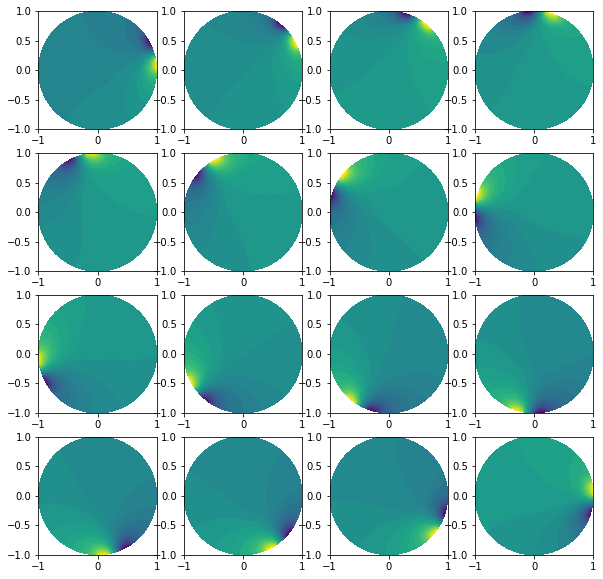

In [39]:
plt.figure(figsize=(10, 10))
for i in range(0, l):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])

### Solver

### Plot Noise

In [35]:
"Getting noised solution"
noise_level=0.05
noise_type='uniform'
if noise_level>1E-10: list_U0_noised = FowardObject.add_noise(noise_level, noise_type, seed=1)

print(list_U0_noised[0:L])

[ 0.76581106 -0.69879612 -0.12031307 -0.07426782 -0.03613244 -0.06032701
 -0.00921196 -0.02997153 -0.01237764 -0.01243345  0.01283371 -0.016902
  0.01313731  0.03007733  0.08000536  0.14465856]


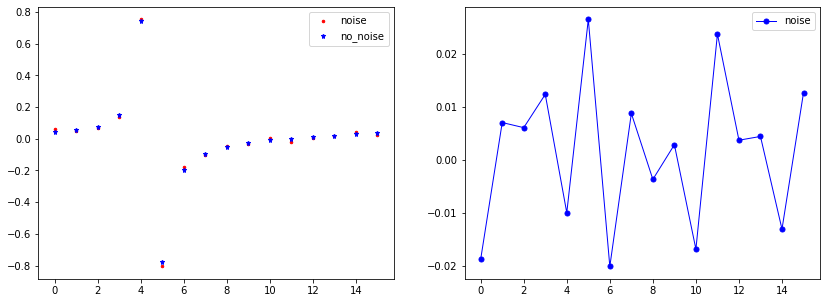

In [36]:
"Plot electrodes noise."
index=4 #Index in array
if noise_level>1E-5:
    vec_U0_noise=list_U0_noised[index*L:(index+1)*L]
    vec_U0=list_U0[index*L:(index+1)*L]
    x=range(len(vec_U0_noise))

    plt.figure(figsize=(14, 5),)
    plt.subplot(1,2,1)
    plt.plot(x, vec_U0_noise, linewidth=0,  marker='.', markersize=5, label="noise", color='red');
    plt.plot(x, vec_U0, linewidth=0,  marker='*', markersize=5, label="no_noise", color="blue");
    plt.legend()
   
    plt.subplot(1,2,2)
    plt.plot(x, vec_U0-vec_U0_noise, linewidth=1,  marker='.', markersize=10, label="noise", color="blue");
    plt.legend()
    
    plt.show()